***
### How LightFM Works?
"A hybrid latent representation recommender model.

The model learns embeddings (latent representations in a high-dimensional space) for users and items in a way that encodes user preferences over items. When multiplied together, these representations produce scores for every item for a given user; items scored highly are more likely to be interesting to the user.

The user and item representations are expressed in terms of representations of their features: an embedding is estimated for every feature, and these features are then summed together to arrive at representations for users and items. For example, if the movie ‘Wizard of Oz’ is described by the following features: ‘musical fantasy’, ‘Judy Garland’, and ‘Wizard of Oz’, then its embedding will be given by taking the features’ embeddings and adding them together. The same applies to user features.

The embeddings are learned through stochastic gradient descent methods."

**source :https://making.lyst.com/lightfm/docs/index.html*

***

### Load Data

In [87]:
#load functions, packages, data etc.
%run ./All_Functions.py

products_df = pd.read_csv("./data/Products.csv")
customers_df = pd.read_csv("./data/Customers.csv")

#get data , choose rating column
rating_column='Quantity'
leave_one_out=False
in_topn_rate='-'
train , test , rating_column = load_dill(rating_column=rating_column,load_cv=False)


### Leave One Out Test

##### removes from the train dataframe each customer's highest rated product 


In [64]:
leave_one_out=True
rating_column='Quantity'
precision='-'
recall='-'

#create trainset 
(loo_train,highest_rated_products ,rating_column)=Leave_highest_rating_out(dataframe=train)

train=loo_train


Rows before: 67107 

Rows after: 61559 



### Create Matrix Dataset

In [88]:
matrix = calculate_sparsity(data=train,rating_column=rating_column,products_df=products_df,customers_df=customers_df,matrix_display='id',
                       compressed=False)

#compressed matrix 
matrix_train = calculate_sparsity(data=train,rating_column=rating_column,products_df=products_df,customers_df=customers_df,matrix_display='id',
                       compressed=True)
matrix_test = calculate_sparsity(data=test,rating_column=rating_column,products_df=products_df,customers_df=customers_df,matrix_display='id',
                       compressed=True)
                        
matrix_train, matrix_test                    

Sparsity: 0.97
Sparsity: 0.97
Sparsity: 0.98


(<5548x421 sparse matrix of type '<class 'numpy.float64'>'
 	with 67107 stored elements in Compressed Sparse Row format>,
 <5548x421 sparse matrix of type '<class 'numpy.float64'>'
 	with 46692 stored elements in Compressed Sparse Row format>)

In [89]:
matrix[:10]
 

ProductId,00BEC3E7-E598-E911-80CF-000D3AB18B8E,00D466F8-CD4E-EA11-A81F-000D3A497E15,014C107A-E898-E911-80CF-000D3AB18B8E,01C94D28-E498-E911-80CF-000D3AB18B8E,02BEC3E7-E598-E911-80CF-000D3AB18B8E,02D466F8-CD4E-EA11-A81F-000D3A497E15,035631AF-E498-E911-80CF-000D3AB18B8E,03B23102-BD9C-E911-80CF-000D3AB18B8E,0436347E-E498-E911-80CF-000D3AB18B8E,04D466F8-CD4E-EA11-A81F-000D3A497E15,...,FC693978-E498-E911-80CF-000D3AB18B8E,FCE44224-E798-E911-80CF-000D3AB18B8E,FD4D0E37-E598-E911-80CF-000D3AB18B8E,FE06929A-EC98-E911-80CF-000D3AB18B8E,FE162BF4-E598-E911-80CF-000D3AB18B8E,FEBDC3E7-E598-E911-80CF-000D3AB18B8E,FEDCF7C2-E898-E911-80CF-000D3AB18B8E,FEF78EB7-EB98-E911-80CF-000D3AB18B8E,FFAAAEB0-E598-E911-80CF-000D3AB18B8E,FFC84D28-E498-E911-80CF-000D3AB18B8E
CustomerId,,,,,,,,,,,,,,,,,,,,,
000CAC9C-AF57-EA11-A81F-000D3A497E15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001C2C84-A312-EA11-A81C-000D3A497E15,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
002861E1-5721-EA11-A81D-000D3A497E15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00382A56-9D15-EA11-A81C-000D3A497E15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00459F71-952D-EA11-A81D-000D3A497E15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
004D58CE-2A38-EA11-A81E-000D3A497E15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0061F14B-F54F-EA11-A81F-000D3A497E15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00621410-9212-EA11-A81C-000D3A497E15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0064A8A3-1E33-EA11-A81D-000D3A497E15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Map IDs To Integers

##### Convert customer_ids and product_ids to integers as for the model's requirements.

In [90]:
customer_dict={}
for customer in enumerate(matrix.index):
    #{'Customer_ID':'0'}
    customer_dict[customer[1]]=customer[0]
    
product_dict={}    
for product in enumerate(matrix.columns):
    #{'Product_ID':'0'}
    product_dict[product[1]]=product[0]

## Training / Hyperparameter Tunning

In [91]:
# #train the model
model=LightFM(loss='warp')
model.fit(interactions=matrix_train, epochs=30 ,num_threads=1,verbose=True)


tuning_timing='-'
tuning_score='-'
tuning_metric='-'
num_samples='-'
# hyperparams= {} 
hyperparams={'epochs': 30,'loss':'warp'}

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [92]:
# hyperparameters ranges available 

# def sample_hyperparameters():
#     """
#     Yield possible hyperparameter choices.
#     """

#     while True:
#         yield {
#             "no_components": np.random.randint(16, 64),
#             "learning_schedule": np.random.choice(["adagrad", "adadelta"]),
#             #"loss": np.random.choice(["bpr", "warp", "warp-kos"]),
#             "loss": np.random.choice(["warp-kos", "warp"]), 
#             "learning_rate": np.random.exponential(0.05),
#             "item_alpha": np.random.exponential(1e-8),
#             "user_alpha": np.random.exponential(1e-8),
#             "max_sampled": np.random.randint(5, 15),
#             "num_epochs": np.random.randint(5, 50),
#         }

In [93]:
tuning_metric='Precision'
#hyperparameter tuning
(train_auc_score, test_auc_score, train_precision, test_precision, train_recall, test_recall,
 hyperparams, model, num_samples, tuning_timing, tuning_metric )=hyperparameter_tuning(trainset=matrix_train, 
                                                                                        testset=matrix_test, tuning_metric='Precision', num_samples=12)

(train_auc_score, test_auc_score, train_precision, test_precision, train_recall, test_recall,
hyperparams, model, num_samples, tuning_timing, tuning_metric)                                                                                        

(0.9917228,
 0.76084834,
 0.95288396,
 0.5368061,
 0.5286512843947051,
 0.40739015315321525,
 {'no_components': 58,
  'learning_schedule': 'adadelta',
  'loss': 'bpr',
  'learning_rate': 0.015217803061834432,
  'item_alpha': 1.1800049189603619e-08,
  'user_alpha': 9.674248969239182e-10,
  'max_sampled': 13,
  'num_epochs': 34},
 12,
 507.00275802612305,
 'Precision')

In [94]:
tuning_score= test_precision

## Get Recommendations

In [95]:
N=5
recommendations=topn_recommedation(train=matrix,model=model,
            customer_dict=customer_dict,product_dict=product_dict,products_df=products_df,customers_df=customers_df,N=N)
recommendations[:5]

,CustomerName,Top5,Top5_Ids
000CAC9C-AF57-EA11-A81F-000D3A497E15,Σπύρος Οικονόμου,"[FREDDO REGULAR BRAZILIAN, RISTRETO CALDO REGU...","[E3E5129F-E998-E911-80CF-000D3AB18B8E, D5E5129..."
001C2C84-A312-EA11-A81C-000D3A497E15,Μιχάλης Παρασκευόπουλος,"[ΨΩΜΙ ΟΛΙΚΗΣ ΑΛΕΣΕΩΣ(ΦΕΤΑ-ΝΤΟΜΑΤΑ), ΜΠΑΓΚΕΤΑ Κ...","[AF4D0E37-E598-E911-80CF-000D3AB18B8E, F34D0E3..."
002861E1-5721-EA11-A81D-000D3A497E15,Δημητρα Λουστροπούλου,"[ΣΤΙΓΜΙΑΙΟΣ ΖΕΣΤΟΣ REGULAR, FRAPPE REGULAR, ΧΕ...","[4419508E-EC98-E911-80CF-000D3AB18B8E, B5700A7..."
00382A56-9D15-EA11-A81C-000D3A497E15,Tatiana Tarasenko,"[CAP CALDO REGULAR ARABICA, ESPRESSO FREDDO BR...","[3BC57A94-EC98-E911-80CF-000D3AB18B8E, A408E89..."
00459F71-952D-EA11-A81D-000D3A497E15,Stylianos Voulgaridis,"[ΣΤΙΓΜΙΑΙΟΣ ΖΕΣΤΟΣ REGULAR, FRAPPE GRANDE, ΕΛΛ...","[4419508E-EC98-E911-80CF-000D3AB18B8E, B3700A7..."


### Look Into Recommendation Results

In [96]:
#top recommendations 
topn=count_topn_occurances(recommendations)
topn

Unique Topn: 5533


,Top5,Times_recommended,top1,top2,top3,top4,top5
0,"[RISTRETO CALDO REGULAR BRAZILIAN, AMERICANO C...",4,RISTRETO CALDO REGULAR BRAZILIAN,AMERICANO CALDO REGULAR BRAZILIAN,ESPR CALDO SINGLE BRAZILIAN,LATTE REGULAR BRAZILIAN,AMERICANO FREDDO REGULAR BRAZILIAN
1,"[CAP CALDO REGULAR ARABICA, ESPRESSO FREDDO BR...",3,CAP CALDO REGULAR ARABICA,ESPRESSO FREDDO BRAZILIAN,"ΑΥΡΑ ΝΕΡΟ 0,5L",CAP CALDO REGULAR BRAZILIAN,ΠΑΓΩΤΟ ΜΕΓΑΛΟ SOFT
2,"[FRAPPE GRANDE, ΣΤΙΓΜΙΑΙΟΣ ΖΕΣΤΟΣ GRANDE, ΦΙΛΤ...",3,FRAPPE GRANDE,ΣΤΙΓΜΙΑΙΟΣ ΖΕΣΤΟΣ GRANDE,ΦΙΛΤΡΟΥ SINGLE,ΕΛΛΗΝΙΚΟΣ ΜΟΝΟΣ ΛΟΥΜΙΔΗΣ,ΦΙΛΤΡΟΥ GRANDE
3,"[CAP CALDO REGULAR ARABICA, ESPRESSO FREDDO BR...",2,CAP CALDO REGULAR ARABICA,ESPRESSO FREDDO BRAZILIAN,ESPRESSO FREDDO ARABICA,FREDDO REGULAR BRAZILIAN,"ΑΥΡΑ ΝΕΡΟ 0,5L"
4,"[CAP CALDO REGULAR BRAZILIAN, ΑΥΡΑ ΝΕΡΟ 0,5L, ...",2,CAP CALDO REGULAR BRAZILIAN,"ΑΥΡΑ ΝΕΡΟ 0,5L",ΓΡΑΝΙΤΑ REGULAR 300ML,ΠΑΓΩΤΟ ΜΕΓΑΛΟ SOFT,ΠΑΓΩΤΟ ΚΥΠΕΛΟ SOFT
...,...,...,...,...,...,...,...
5528,"[FREDDO GRANDE BRAZILIAN, ΓΑΛ.ΚΡΟΥΑΣΑΝ ΣΟΚ.-ΦΟ...",1,FREDDO GRANDE BRAZILIAN,ΓΑΛ.ΚΡΟΥΑΣΑΝ ΣΟΚ.-ΦΟΥΝ.,ΚΡΟΥΑΣΑΝ ΜΕ ΤΡΙΠΛΗ ΣΟΚΟΛΑΤΑ,ΦΙΛΤΡΟΥ GRANDE,ΜΠΑΡΑ ΔΗΜΗΤΡΙΑΚΩΝ ΜΕ ΣΟΚΟΛΑΤΑ ΑΜΥΓΔΑΛΟ
5529,"[LATTE REGULAR BRAZILIAN, ΚΡΕΜΑ ΚΛΑΣΙΚΗ BR RE...",1,LATTE REGULAR BRAZILIAN,ΚΡΕΜΑ ΚΛΑΣΙΚΗ BR REG,AMERICANO CALDO REGULAR BRAZILIAN,ΕΛΛΗΝΙΚΟΣ ΔΙΠΛΟΣ ΛΟΥΜΙΔΗΣ,ESPR CALDO REGULAR BRAZILIAN
5530,"[ΑΥΡΑ ΝΕΡΟ 1,5L, AMERICANO CALDO REGULAR BRAZI...",1,"ΑΥΡΑ ΝΕΡΟ 1,5L",AMERICANO CALDO REGULAR BRAZILIAN,LUNGO CALDO REGULAR ARABICA,MACCHIATO CALDO (ΑΦΡΟΓΑΛΑ) REGULAR ARABICA,ESPR CALDO SINGLE BRAZILIAN
5531,"[ESP FREDDO REG(TAXI), ΣΤΙΓΜΙΑΙΟΣ ΖΕΣΤΟΣ REGUL...",1,ESP FREDDO REG(TAXI),ΣΤΙΓΜΙΑΙΟΣ ΖΕΣΤΟΣ REGULAR(TAXI),ΕΛΛΗΝΙΚΟΣ ΔΙΠΛΟΣ ΛΟΥΜΙΔΗΣ,MINI TORTILLA ΣΙΤΟΥ ΜΕ ΚΟΤΟΠΟΥΛΟ,LATTE REGULAR ARABICA


In [97]:
#unique recommendations   
unique_topNs=topn.shape[0] / train['CustomerId'].nunique() * 100
print("Unique recommendations per customer: {0}%".format(round(unique_topNs ,2)))

Unique recommendations per customer: 99.73%


In [98]:
product_popularity_in_recommendations(recommendation_df=recommendations,N=N)

Unique products in all TopN: 251 


{'LATTE  REGULAR BRAZILIAN': 704,
 'AMERICANO CALDO REGULAR BRAZILIAN': 651,
 'RISTRETO CALDO REGULAR BRAZILIAN': 566,
 'ESPR CALDO SINGLE BRAZILIAN': 551,
 'FRAPPE GRANDE': 489,
 'ΦΙΛΤΡΟΥ SINGLE': 429,
 'ΕΛΛΗΝΙΚΟΣ ΜΟΝΟΣ ΛΟΥΜΙΔΗΣ': 397,
 'MACCHIATO CALDO (ΑΦΡΟΓΑΛΑ) REGULAR ARABICA': 364,
 'FREDDO GRANDE BRAZILIAN': 350,
 'ΣΤΙΓΜΙΑΙΟΣ ΖΕΣΤΟΣ GRANDE': 350,
 'ESPR. CALDO REGULAR DECAF.': 342,
 'ESPR CALDO SINGLE ARABICA': 338,
 'CALDO REGULAR DECAF.': 332,
 'AMERICANO CALDO REGULAR ARABICA': 330,
 'ΚΡΕΜΑ ΚΛΑΣΙΚΗ BR GRA': 300,
 'ΕΛΛΗΝΙΚΟΣ ΔΙΠΛΟΣ ΛΟΥΜΙΔΗΣ': 291,
 'FREDDO REGULAR DECAF.': 286,
 'ΣΚΕΠΑΣΤΗ ΠΙΤΑ ΛΑΧΑΝΙΚΩΝ': 283,
 'ΧΕΙΡ.ΚΟΥΛ.ΘΕΣ/ΚΗΣ ΖΑΜΠΟΝ': 279,
 'ΚΡΕΜΑ ΚΛΑΣΙΚΗ BR REG': 278,
 'ΦΙΛΤΡΟΥ REGULAR': 272,
 'ΜΠΑΓΚΕΤΙΝΙ ΖΑΜΠΟΝ-ΤΥΡΙ ΕΝΤΑΜ': 264,
 'MUFFIN ΜΕ ΛΕΜΟΝΙ': 262,
 'ΧΩΡΙΑΤΙΚΗ ΣΠΑΝΑΚΟΠΙΤΑ': 262,
 'ΚΡΕΜΑ ΜΑΣΤΙΧΑ BR REG': 257,
 'COCA COLA PET 0,5L': 255,
 'FREDDO GRANDE ARABICA': 253,
 'MIX ΕΝΕΡΓΕΙΑΣ 45γρ.': 246,
 'LATTE  REGULAR ARABICA': 232,
 'BIG BURGER': 231,
 'COCA ZERO ΚΥΤΙΟ 0

In [99]:
unique_TopN_products=len(product_popularity_in_recommendations(recommendation_df=recommendations,N=N)) / train['ProductId'].nunique() *100
print("Unique products in recommendations : {0}%".format(round(unique_TopN_products ,2)))

Unique products in all TopN: 251 
Unique products in recommendations : 59.62%


In [100]:
count_product_in_topn(product_name='ESPRESSO FREDDO ARABICA',recommendations=recommendations)

False    5485
True       63
Name: topn_to_str, dtype: int64

## Hit Rate

In [101]:
#hit rate 
(hit_rate ,hits ,count_customers ,timing ,products_in_hits ,threshold, customer_dictionaries) = calculate_accuracy(recommend=recommendations,
                        train=train,test=test,products_df=products_df,customers_df=customers_df,threshold=1,N=N,show=False)

Time:
Accuracy:


In [102]:
(hit_rate ,hits ,count_customers ,timing ,threshold)

(0.26, 1286, 4948, 360.5585174560547, 1)

In [103]:
#preview
products_in_hits[:5]

['CAP CALDO REGULAR ARABICA',
 'ESPR CALDO SINGLE ARABICA',
 'MUFFIN MERENDA',
 'COCA COLA ΚΥΤΙΟ 0,33L',
 'ESPR CALDO REGULAR BRAZILIAN']

In [104]:
hit_popularity_matrix(hit_products=products_in_hits)


,Product,Hits
1,RISTRETO CALDO REGULAR BRAZILIAN,78
2,FREDDO GRANDE BRAZILIAN,76
3,FREDDO GRANDE ARABICA,53
4,ESPRESSO FREDDO BRAZILIAN,48
5,FREDDO REGULAR BRAZILIAN,45
...,...,...
152,LUNGO CALDO REGULAR BRAZILIAN,1
153,LUNGO CALDO REGULAR ARABICA,1
154,LIFE ΠΟ-ΓΚΡΕΙΠ-ΣΑ 400ml PET,1
155,ΚΡΕΜΑ ΚΛΑΣΣΙΚΗ REGULAR DECAF.,1


In [105]:
#Recommendation Results for each customer
customer_dictionaries[:2]

[defaultdict(int,
             {'CustomerId': '000CAC9C-AF57-EA11-A81F-000D3A497E15',
              'CustomerName': 'Σπύρος Οικονόμου',
              'Recommendations': ['FREDDO REGULAR BRAZILIAN',
               'RISTRETO CALDO REGULAR BRAZILIAN',
               'ΣΤΙΓΜΙΑΙΟΣ ΖΕΣΤΟΣ REGULAR',
               'ΚΡΕΜΑ ΜΑΣΤΙΧΑ BR REG',
               'ΠΑΓΩΤΟ ΜΙΚΡΟ SOFT'],
              'Will_buy': ['ESPRESSO FREDDO ARABICA',
               'ΧΕΙΡΟΠ. ΑΥΘ. ΠΟΛΙΤΙΚΗ ΚΟΥΡΟΥ',
               'ΓΑΛ.ΚΡΟΥΑΣΑΝ ΣΟΚ.-ΦΟΥΝ.',
               'ESPRESSO FREDDO BRAZILIAN',
               'ΠΑΡΑΔΟΣΙΑΚΗ ΤΥΡΟΠΙΤΑ',
               'ΧΩΡ. ΣΠΑΝΑΚΟΤΥΡΟΠΙΤΑ ΤΑΨΙΟΥ ΜΕ ΦΕΤΑ ΠΟΠ'],
              'Hits_number': 0,
              'Hits': [],
              'Prior_purchases': ['ESPRESSO FREDDO ARABICA',
               'FREDDO REGULAR ARABICA',
               'ESPRESSO FREDDO BRAZILIAN',
               'FRAPPE REGULAR',
               'ΚΡΕΜΑ ΚΛΑΣΙΚΗ BR REG',
               'ESPR CALDO REGULAR BRAZILIAN',
               'ΠΑΡΑΔΟΣ

## Presicion & Recall

In [106]:
#calculate presicion
ptemp=precision_at_k(model, matrix_test, k=N)
precision=ptemp.mean()
#round up precision avg 
precision = round( float(precision),2)
print('P mean: {0}'.format(precision))
#precision distribution
values, count= np.unique(ptemp,return_counts=True)
dict(zip(values,count))

P mean: 0.54


{0.0: 58, 0.2: 791, 0.4: 1588, 0.6: 1788, 0.8: 1055, 1.0: 268}

In [107]:
#calculate recall
rtemp=recall_at_k(model=model,test_interactions=matrix_test, k=N, check_intersections=False)
#round up array's numbers 
rtemp=np.round(rtemp,2)
#round up avg recall
recall=rtemp.mean()
recall=round(float(recall),2)
print('R mean: {0}'.format(recall))
#recall distribution
values, count= np.unique(rtemp,return_counts=True)
dict(zip(values,count))
# plt.plot(rtemp,'r.')

R mean: 0.41


{0.0: 58,
 0.03: 3,
 0.04: 2,
 0.05: 6,
 0.06: 10,
 0.07: 15,
 0.08: 20,
 0.09: 34,
 0.1: 30,
 0.11: 56,
 0.12: 88,
 0.13: 29,
 0.14: 111,
 0.15: 55,
 0.16: 22,
 0.17: 146,
 0.18: 87,
 0.19: 48,
 0.2: 194,
 0.21: 72,
 0.22: 107,
 0.23: 72,
 0.24: 24,
 0.25: 350,
 0.26: 11,
 0.27: 151,
 0.28: 3,
 0.29: 233,
 0.3: 100,
 0.31: 67,
 0.33: 532,
 0.36: 101,
 0.38: 201,
 0.4: 287,
 0.42: 14,
 0.43: 206,
 0.44: 109,
 0.45: 24,
 0.5: 641,
 0.56: 26,
 0.57: 109,
 0.6: 196,
 0.62: 20,
 0.67: 296,
 0.71: 19,
 0.75: 176,
 0.8: 51,
 0.83: 10,
 1.0: 326}

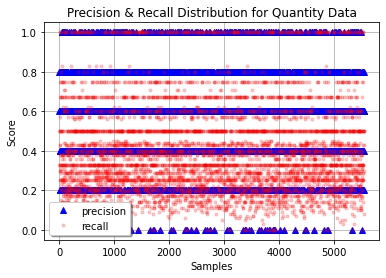

In [108]:
plt.plot(ptemp,'b^',label='precision')
plt.plot(rtemp,'r.',label='recall',alpha=0.2)
plt.legend(shadow=True)
plt.title('Precision & Recall Distribution for {0} Data'.format(rating_column))
plt.xlabel('Samples')
plt.ylabel('Score')
plt.grid()

## Update Logs

In [109]:
#update train log
train_log=training_log2(rating_column=rating_column, algo=model, tuning_time=tuning_timing, num_samples=num_samples,
                        tuning_score= tuning_score , tuning_metric='Precision', create_log=False,hyperparams=hyperparams,LOO=leave_one_out)
train_log              

,Date,Data,Algo,Tunning,Tunning_time,Tuning_Samples,Parameters,Tuning_Metric,Tuning_score,Leave_one_out
1,2021-12-09 16:28:51.768367,Quantity,LightFM,True,229.666846,12,"{'no_components': 43, 'learning_schedule': 'ad...",Precision,0.487707,False
2,2021-12-09 16:46:35.604966,Quantity,LightFM,True,287.11,12,"{'no_components': 62, 'learning_schedule': 'ad...",Precision,0.490844,False
3,2021-12-09 16:57:48.060101,Quantity,LightFM,True,182.59,12,"{'no_components': 58, 'learning_schedule': 'ad...",Precision,0.481255,False
4,2021-12-09 17:23:57.139350,Quantity,LightFM,True,360.88,12,"{'no_components': 57, 'learning_schedule': 'ad...",Precision,0.493079,False
5,2021-12-09 20:35:25.020300,Quantity,LightFM,False,-,-,{},-,-,False
6,2021-12-09 23:30:59.326916,Quantity,LightFM,False,-,-,"{'epochs': 30, 'loss': 'warp'}",-,-,False
7,2021-12-10 00:01:01.911317,Frequency1,LightFM,True,290.82,12,"{'no_components': 43, 'learning_schedule': 'ad...",Precision,0.51,False
8,2021-12-10 00:16:31.527563,Frequency1,LightFM,False,-,-,"{'epochs': 30, 'loss': 'warp'}",-,-,False
9,2021-12-10 00:35:53.070734,Frequency2,LightFM,False,-,-,"{'epochs': 30, 'loss': 'warp'}",-,-,False
10,2021-12-10 01:00:08.758762,Frequency2,LightFM,True,490.19,12,"{'no_components': 54, 'learning_schedule': 'ad...",Precision,0.53,False


In [110]:
# evaluate recommendations 

preview=evaluation_log(rating_column=rating_column, algo=model, N=N, precision_avg=precision, recall_avg=recall,
                hit_rate=hit_rate,hits=hits, hit_threshold=threshold,count_customers=count_customers, time_elapsed=timing,
                unique_TopN=unique_topNs, unique_products=unique_TopN_products,loo_rate='-',leave_one_out=leave_one_out,create_log=False)

preview                

,Date,Data,Algo,Leave_one_out,N,Precision@N,Recall@N,Hit_rate,Hits,Hit_threshold,Count_customers,Compute_time,Unique_TopN,Unique_Products,LOO_Rate
1,2021-12-09 16:31:09.354582,Quantity,LightFM,False,5,0.49,0.37,0.45,2231,1,4948,318.13,1.0,0.57,-
2,2021-12-09 16:46:35.756778,Quantity,LightFM,False,5,0.49,0.38,0.4,1971,1,4948,358.38,0.999,0.57,-
3,2021-12-09 16:57:48.179646,Quantity,LightFM,False,5,0.48,0.37,0.46,2275,1,4948,304.21,1.0,0.54,-
4,2021-12-09 17:23:57.331810,Quantity,LightFM,False,5,0.49,0.38,0.38,1884,1,4948,331.66,0.997,0.92,-
5,2021-12-09 20:16:26.641952,Quantity,LightFM,False,5,0.5,0.38,0.6,2973,1,4948,365.3,0.995,0.29,-
6,2021-12-09 20:58:42.762085,Quantity,BaselineOnly,False,5,0.06,0.09,0.26,1274,1,4948,306.21,0.017,0.04,-
7,2021-12-09 21:14:21.084681,Quantity,NMF,False,5,0.05,0.07,0.22,1109,1,4948,335.01,0.431,0.11,-
8,2021-12-09 23:10:18.561622,Quantity,SVD,False,5,0.11,0.17,0.45,2210,1,4948,359.52,0.121,0.06,-
9,2021-12-09 23:31:41.798261,Quantity,SVDpp,False,5,0.1,0.14,0.39,1935,1,4948,409.98,0.259,0.05,-
10,2021-12-09 23:46:22.028601,Frequency1,BaselineOnly,False,5,0.07,0.1,0.29,1439,1,4948,454.19,0.028,0.04,-


## Leave One Out Evaluation 

In [82]:
train1 , test1 , rating_column = load_dill(rating_column=rating_column,load_cv=False)


In [83]:
customer=train['CustomerId'].drop_duplicates().sample(1).values[0]
df=leave_one_out_info(customer=customer,data=train1,removed_ratings=highest_rated_products,products_df=products_df,
                   customers_df=customers_df,rating_column=rating_column)
df

,index,Customer_Name,Product_Names,Quantity
0,25240,Κωνσταντίνος Παπαλεξίου,"ΑΥΡΑ ΝΕΡΟ 0,5L",2.000000
1,25241,Κωνσταντίνος Παπαλεξίου,CAP CALDO REGULAR ARABICA,24.000000
2,25242,Κωνσταντίνος Παπαλεξίου,ΠΑΡΑΔΟΣΙΑΚΟ ΠΕΙΝΕΡΛΙ,1.000000
3,25243,Κωνσταντίνος Παπαλεξίου,MUFFIN MERENDA,1.000000
4,25244,Κωνσταντίνος Παπαλεξίου,ΠΟΛΥΣ. ΜΠΑΓΚ.(ΓΑΛΟΠΟΥΛΑ-ΤΥΡΙ DIROLLO),1.000000
5,25245,Κωνσταντίνος Παπαλεξίου,ESPR CALDO SINGLE BRAZILIAN,1.000000
6,25246,Κωνσταντίνος Παπαλεξίου,CALDO SINGLE ARABICA,1.000000
7,25241,Κωνσταντίνος Παπαλεξίου,CAP CALDO REGULAR ARABICA,24.000000


In [84]:
(in_topn_rate ,in_topn  , customerid_in_topn, time_passed) =LeaveOneOut_hitrate(left_out_products=highest_rated_products,recommendations=recommendations,N=N)


(in_topn_rate , in_topn , customerid_in_topn[:2])

(0.66,
 3632,
 ['000CAC9C-AF57-EA11-A81F-000D3A497E15',
  '00459F71-952D-EA11-A81D-000D3A497E15'])

In [85]:
train_log=training_log2(rating_column=rating_column, algo=model, tuning_time=tuning_timing, num_samples=num_samples,
                        tuning_score= tuning_score , tuning_metric='Precision', create_log=False,hyperparams=hyperparams,LOO=leave_one_out)
train_log  

,Date,Data,Algo,Tunning,Tunning_time,Tuning_Samples,Parameters,Tuning_Metric,Tuning_score,Leave_one_out
1,2021-12-09 16:28:51.768367,Quantity,LightFM,True,229.666846,12,"{'no_components': 43, 'learning_schedule': 'ad...",Precision,0.487707,False
2,2021-12-09 16:46:35.604966,Quantity,LightFM,True,287.11,12,"{'no_components': 62, 'learning_schedule': 'ad...",Precision,0.490844,False
3,2021-12-09 16:57:48.060101,Quantity,LightFM,True,182.59,12,"{'no_components': 58, 'learning_schedule': 'ad...",Precision,0.481255,False
4,2021-12-09 17:23:57.139350,Quantity,LightFM,True,360.88,12,"{'no_components': 57, 'learning_schedule': 'ad...",Precision,0.493079,False
5,2021-12-09 20:35:25.020300,Quantity,LightFM,False,-,-,{},-,-,False
6,2021-12-09 23:30:59.326916,Quantity,LightFM,False,-,-,"{'epochs': 30, 'loss': 'warp'}",-,-,False
7,2021-12-10 00:01:01.911317,Frequency1,LightFM,True,290.82,12,"{'no_components': 43, 'learning_schedule': 'ad...",Precision,0.51,False
8,2021-12-10 00:16:31.527563,Frequency1,LightFM,False,-,-,"{'epochs': 30, 'loss': 'warp'}",-,-,False
9,2021-12-10 00:35:53.070734,Frequency2,LightFM,False,-,-,"{'epochs': 30, 'loss': 'warp'}",-,-,False
10,2021-12-10 01:00:08.758762,Frequency2,LightFM,True,490.19,12,"{'no_components': 54, 'learning_schedule': 'ad...",Precision,0.53,False


In [86]:
preview=evaluation_log(rating_column=rating_column, algo=model, N=N, precision_avg=precision, recall_avg=recall,
                hit_rate=hit_rate,hits=hits, hit_threshold=threshold,count_customers=count_customers, time_elapsed=timing,
                unique_TopN=unique_topNs, unique_products=unique_TopN_products,loo_rate=in_topn_rate ,leave_one_out=leave_one_out,create_log=False)

preview       

,Date,Data,Algo,Leave_one_out,N,Precision@N,Recall@N,Hit_rate,Hits,Hit_threshold,Count_customers,Compute_time,Unique_TopN,Unique_Products,LOO_Rate
1,2021-12-09 16:31:09.354582,Quantity,LightFM,False,5,0.49,0.37,0.45,2231,1,4948,318.13,1.0,0.57,-
2,2021-12-09 16:46:35.756778,Quantity,LightFM,False,5,0.49,0.38,0.4,1971,1,4948,358.38,0.999,0.57,-
3,2021-12-09 16:57:48.179646,Quantity,LightFM,False,5,0.48,0.37,0.46,2275,1,4948,304.21,1.0,0.54,-
4,2021-12-09 17:23:57.331810,Quantity,LightFM,False,5,0.49,0.38,0.38,1884,1,4948,331.66,0.997,0.92,-
5,2021-12-09 20:16:26.641952,Quantity,LightFM,False,5,0.5,0.38,0.6,2973,1,4948,365.3,0.995,0.29,-
6,2021-12-09 20:58:42.762085,Quantity,BaselineOnly,False,5,0.06,0.09,0.26,1274,1,4948,306.21,0.017,0.04,-
7,2021-12-09 21:14:21.084681,Quantity,NMF,False,5,0.05,0.07,0.22,1109,1,4948,335.01,0.431,0.11,-
8,2021-12-09 23:10:18.561622,Quantity,SVD,False,5,0.11,0.17,0.45,2210,1,4948,359.52,0.121,0.06,-
9,2021-12-09 23:31:41.798261,Quantity,SVDpp,False,5,0.1,0.14,0.39,1935,1,4948,409.98,0.259,0.05,-
10,2021-12-09 23:46:22.028601,Frequency1,BaselineOnly,False,5,0.07,0.1,0.29,1439,1,4948,454.19,0.028,0.04,-
